# Libraries

In [1]:
import pandas as pd

pd.set_option("display.max_columns", 200)

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import set_config

set_config(transform_output="pandas")

from category_encoders import HashingEncoder


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    ConfusionMatrixDisplay,
)


import sys

sys.path.insert(0, "../src")
from eval_classification import eval_classification

del sys.path[0]

# Load Data

In [2]:
df = pd.read_parquet("../data/processed/merged_data.parquet")
df

,track_id,genre,title,artist_name,duration,year_x,&,000,1,10,100,12,13,15,16,2,20,24,2x,3,30,3x,4,40,4x,5,50,6,7,8,9,a,aaah,aah,aan,ab,abandon,aber,abl,aboard,about,abov,abr,absenc,absolut,absurd,abus,abyss,acaba,acabar,accept,accid,accus,ace,ach,achiev,acid,across,act,action,actor,actual,ad,adam,add,addict,adentro,adesso,adio,adió,admir,admit,ador,advanc,adventur,advic,afar,affair,affect,afford,afraid,africa,after,afternoon,again,against,age,ago,agoni,agora,agre,agua,ah,aha,ahead,ahh,ahhh,ahi,ahora,ahí,...,wood,wooden,word,wore,work,workin,world,worm,worn,worri,wors,worship,worst,wort,worth,worthi,worthless,would,wound,wow,wrap,wrath,wreck,wretch,wrist,write,writer,written,wrong,wrote,wär,x,x2,x3,x4,y,ya,yah,yall,yang,yard,ye,yea,yeah,year_y,yearn,yeh,yell,yellow,yer,yes,yesterday,yet,yeux,yi,yo,yonder,york,you,young,younger,your,yourself,youth,you´r,youâr,you’r,yuh,z,za,ze,zeit,zero,zijn,zo,zombi,zone,zoo,zu,zum,zur,zurück,zwei,,¿qué,à,â,är,å,ça,è,é,él,és,était,être,ô,über,–,‘caus
1,TRAAABD128F429CF47,Pop_Rock,Soul Deep,The Box Tops,148.03546,1969,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,TRAAAEF128F4273421,Pop_Indie,Something Girls,Adam Ant,233.40363,1982,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,TRAAAFD128F92F423A,Pop_Rock,Face the Ashes,Gob,209.60608,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,TRAAAHJ128F931194C,Pop_Indie,The Last Beat Of My Heart (b-side),Devotchka,337.81506,2004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,TRAAAHZ128E0799171,Rap,The One And Only (Edited),Snoop Dogg,230.42567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,7,0,0,0,0,1,0,1,0,0,0,0,0,0,0,10,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [3]:
df["year_x"] = df["year_x"]/1000
df["duration"] = df["duration"]/60
df

,track_id,genre,title,artist_name,duration,year_x,&,000,1,10,100,12,13,15,16,2,20,24,2x,3,30,3x,4,40,4x,5,50,6,7,8,9,a,aaah,aah,aan,ab,abandon,aber,abl,aboard,about,abov,abr,absenc,absolut,absurd,abus,abyss,acaba,acabar,accept,accid,accus,ace,ach,achiev,acid,across,act,action,actor,actual,ad,adam,add,addict,adentro,adesso,adio,adió,admir,admit,ador,advanc,adventur,advic,afar,affair,affect,afford,afraid,africa,after,afternoon,again,against,age,ago,agoni,agora,agre,agua,ah,aha,ahead,ahh,ahhh,ahi,ahora,ahí,...,wood,wooden,word,wore,work,workin,world,worm,worn,worri,wors,worship,worst,wort,worth,worthi,worthless,would,wound,wow,wrap,wrath,wreck,wretch,wrist,write,writer,written,wrong,wrote,wär,x,x2,x3,x4,y,ya,yah,yall,yang,yard,ye,yea,yeah,year_y,yearn,yeh,yell,yellow,yer,yes,yesterday,yet,yeux,yi,yo,yonder,york,you,young,younger,your,yourself,youth,you´r,youâr,you’r,yuh,z,za,ze,zeit,zero,zijn,zo,zombi,zone,zoo,zu,zum,zur,zurück,zwei,,¿qué,à,â,är,å,ça,è,é,él,és,était,être,ô,über,–,‘caus
1,TRAAABD128F429CF47,Pop_Rock,Soul Deep,The Box Tops,2.467258,1.969,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,TRAAAEF128F4273421,Pop_Indie,Something Girls,Adam Ant,3.890060,1.982,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,TRAAAFD128F92F423A,Pop_Rock,Face the Ashes,Gob,3.493435,2.007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,TRAAAHJ128F931194C,Pop_Indie,The Last Beat Of My Heart (b-side),Devotchka,5.630251,2.004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,TRAAAHZ128E0799171,Rap,The One And Only (Edited),Snoop Dogg,3.840428,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,7,0,0,0,0,1,0,1,0,0,0,0,0,0,0,10,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77663 entries, 1 to 127401
Columns: 5006 entries, track_id to ‘caus
dtypes: float64(2), int64(5000), object(4)
memory usage: 2.9+ GB


In [5]:
df.duplicated(subset="track_id").sum()

np.int64(0)

In [6]:
df.isna().sum().sum()

np.int64(0)

In [7]:
lookup = df[["track_id", "genre", "title", "artist_name"]]
lookup

,track_id,genre,title,artist_name
1,TRAAABD128F429CF47,Pop_Rock,Soul Deep,The Box Tops
3,TRAAAEF128F4273421,Pop_Indie,Something Girls,Adam Ant
4,TRAAAFD128F92F423A,Pop_Rock,Face the Ashes,Gob
5,TRAAAHJ128F931194C,Pop_Indie,The Last Beat Of My Heart (b-side),Devotchka
6,TRAAAHZ128E0799171,Rap,The One And Only (Edited),Snoop Dogg
...,...,...,...,...
127395,TRZZZLI128F147BC2E,Pop_Rock,China De Sade (Album Version),My Life With The Thrill Kill Kult
127396,TRZZZMM128F42819C0,Pop_Rock,Tables Will Turn,Presence
127397,TRZZZQO128E078864C,Metal_Heavy,Weight Of The World (LP Version),Overkill
127398,TRZZZWS128F429CF87,Latin,Que No Destrocen Tu Vida,Los Prisioneros


# Split Data

In [8]:
df = df.set_index("track_id")
X = df.drop(columns=["genre", "title", "artist_name"])
y = df["genre"].copy()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42, stratify=y_test
)

In [10]:
from scipy.sparse import csr_matrix

X_train = pd.DataFrame.sparse.from_spmatrix(csr_matrix(X_train))
X_val = pd.DataFrame.sparse.from_spmatrix(csr_matrix(X_val))
X_test = pd.DataFrame.sparse.from_spmatrix(csr_matrix(X_test))

# Classifier Testing

In [17]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_max_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 're

## Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42, class_weight="balanced", solver="saga", n_jobs=-1).fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/lyrics_env/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


                    Train Evaluation                                                         Test Evaluation                                     
                   precision    recall  f1-score   support                                  precision    recall  f1-score   support              
                                                                                                                                                 
            Latin       0.75      0.93      0.83      4430                           Latin       0.74      0.90      0.81       554              
Metal_Alternative       0.39      0.42      0.40      6659               Metal_Alternative       0.33      0.36      0.35       832              
      Metal_Death       0.43      0.74      0.55      4951                     Metal_Death       0.39      0.67      0.49       619              
      Metal_Heavy       0.32      0.36      0.34      4554                     Metal_Heavy       0.24      0.26      0.25   

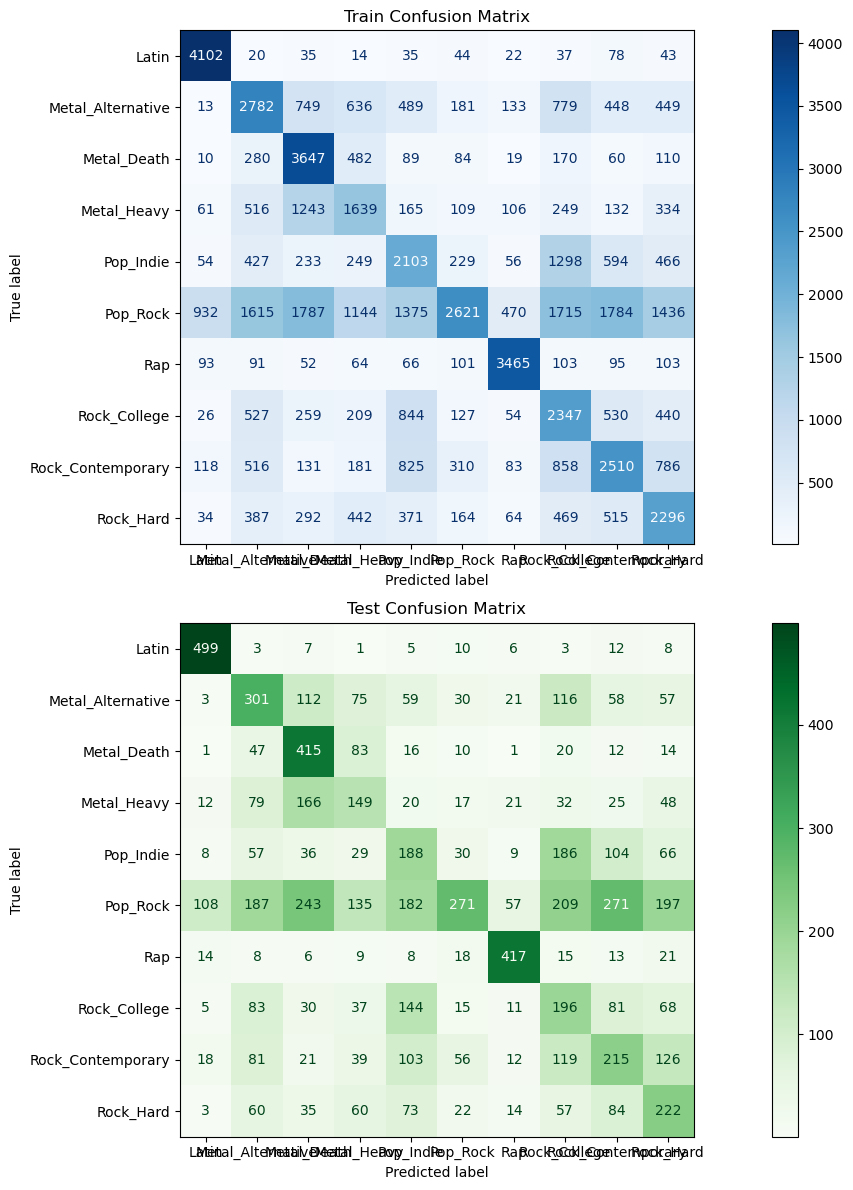

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1
Logistic Regression,0.442813,0.369946,0.486733,0.408792,0.442813,0.369946,0.425394,0.354696


In [12]:
clf_results = eval_classification(clf, X_train, y_train, X_val, y_val, model_name="Logistic Regression", average="weighted")
clf_results

## Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight="balanced_subsample").fit(X_train, y_train)

                    Train Evaluation                                                         Test Evaluation                                     
                   precision    recall  f1-score   support                                  precision    recall  f1-score   support              
                                                                                                                                                 
            Latin       1.00      1.00      1.00      4430                           Latin       0.79      0.91      0.85       554              
Metal_Alternative       1.00      1.00      1.00      6659               Metal_Alternative       0.34      0.17      0.23       832              
      Metal_Death       1.00      1.00      1.00      4951                     Metal_Death       0.46      0.53      0.49       619              
      Metal_Heavy       1.00      1.00      1.00      4554                     Metal_Heavy       0.36      0.03      0.06   

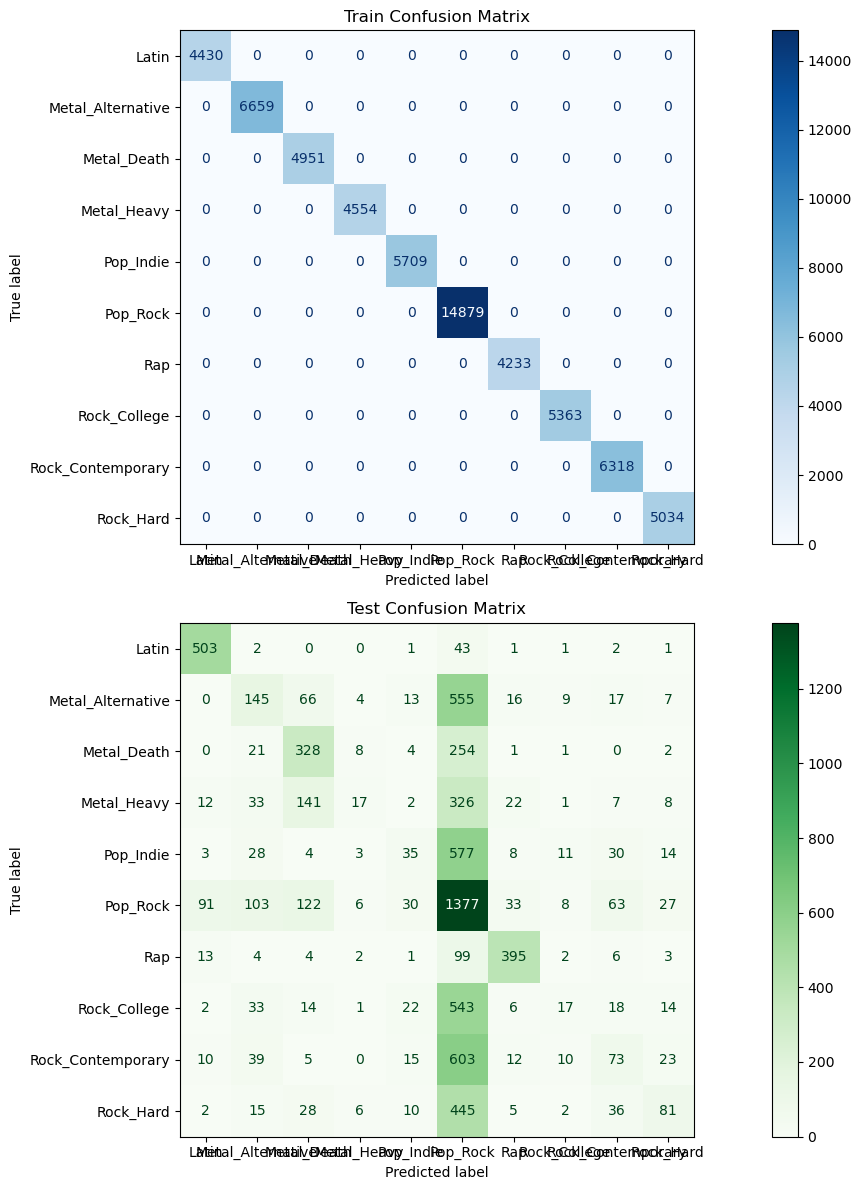

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1
Logistic Regression,0.442813,0.369946,0.486733,0.408792,0.442813,0.369946,0.425394,0.354696
Random Forest,1.000000,0.382565,1.000000,0.392468,1.000000,0.382565,1.000000,0.321532


In [14]:
rf_results = eval_classification(rf, X_train, y_train, X_val, y_val, model_name="Random Forest", average="weighted", results_frame=clf_results)
rf_results

## Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, class_weight="balanced").fit(X_train, y_train)

                    Train Evaluation                                                         Test Evaluation                                     
                   precision    recall  f1-score   support                                  precision    recall  f1-score   support              
                                                                                                                                                 
            Latin       1.00      1.00      1.00      4430                           Latin       0.74      0.71      0.73       554              
Metal_Alternative       1.00      1.00      1.00      6659               Metal_Alternative       0.20      0.20      0.20       832              
      Metal_Death       1.00      1.00      1.00      4951                     Metal_Death       0.32      0.32      0.32       619              
      Metal_Heavy       1.00      1.00      1.00      4554                     Metal_Heavy       0.13      0.13      0.13   

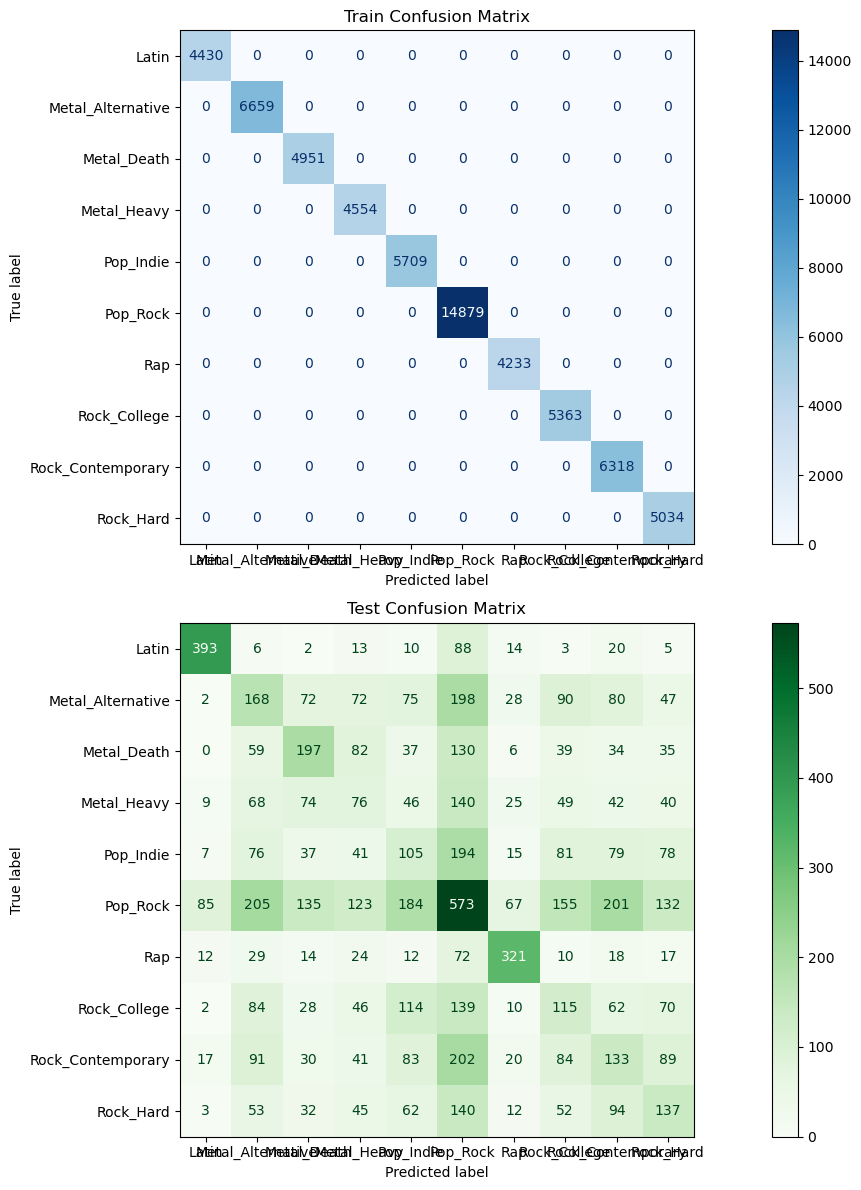

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1
Logistic Regression,0.442813,0.369946,0.486733,0.408792,0.442813,0.369946,0.425394,0.354696
Random Forest,1.000000,0.382565,1.000000,0.392468,1.000000,0.382565,1.000000,0.321532
Decision Tree,1.000000,0.285604,1.000000,0.287596,1.000000,0.285604,1.000000,0.286556


In [16]:
dt_results = eval_classification(dt, X_train, y_train, X_val, y_val, model_name="Decision Tree", average="weighted", results_frame=rf_results)
dt_results

## Hist Gradient Boosting Classifier

In [18]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42, class_weight="balanced", scoring="balanced_accuracy").fit(X_train.sparse.to_dense(), y_train)

                    Train Evaluation                                                         Test Evaluation                                     
                   precision    recall  f1-score   support                                  precision    recall  f1-score   support              
                                                                                                                                                 
            Latin       0.78      0.98      0.87      4430                           Latin       0.76      0.91      0.83       554              
Metal_Alternative       0.51      0.56      0.53      6659               Metal_Alternative       0.34      0.40      0.37       832              
      Metal_Death       0.53      0.77      0.63      4951                     Metal_Death       0.43      0.62      0.51       619              
      Metal_Heavy       0.47      0.51      0.49      4554                     Metal_Heavy       0.25      0.27      0.26   

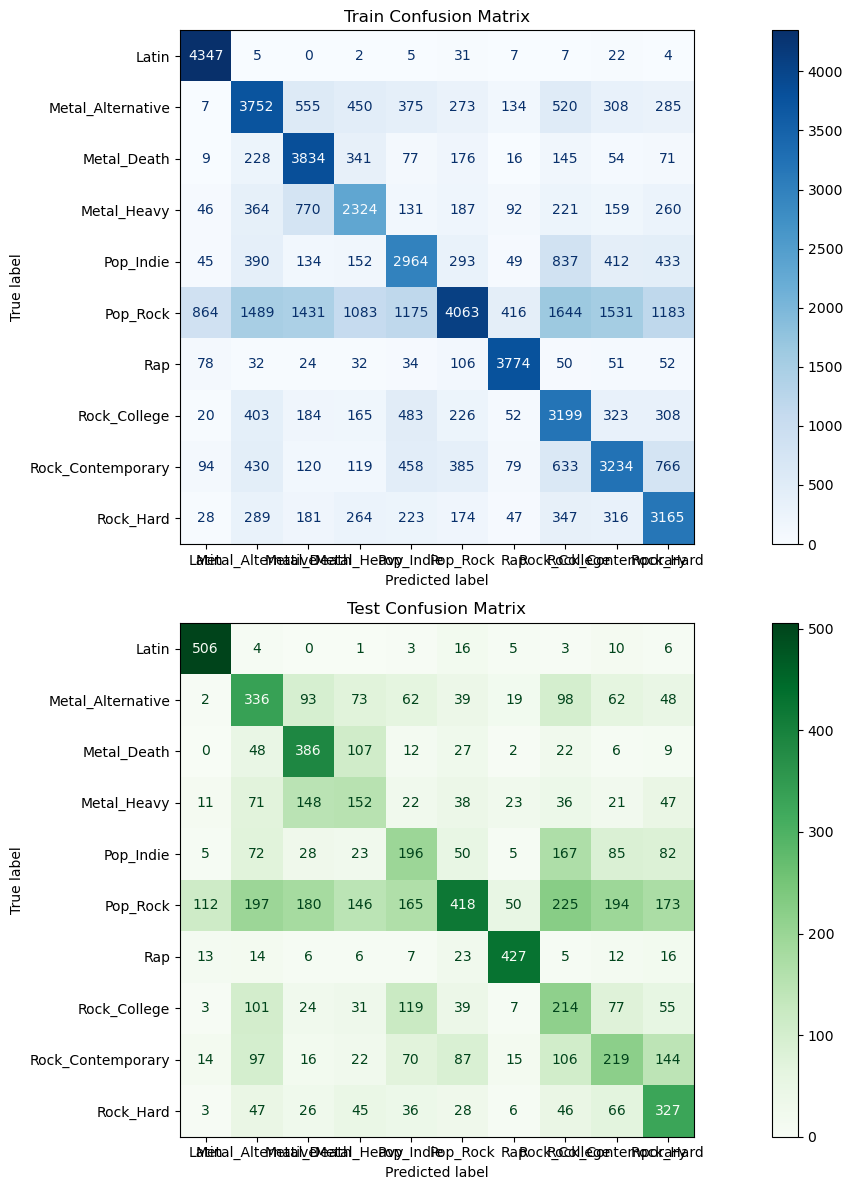

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1
Logistic Regression,0.442813,0.369946,0.486733,0.408792,0.442813,0.369946,0.425394,0.354696
Random Forest,1.000000,0.382565,1.000000,0.392468,1.000000,0.382565,1.000000,0.321532
Decision Tree,1.000000,0.285604,1.000000,0.287596,1.000000,0.285604,1.000000,0.286556
HG Boosting Classification Tree,0.557798,0.409606,0.579736,0.430526,0.557798,0.409606,0.542367,0.399854


In [19]:
hgb_results = eval_classification(hgb, X_train.sparse.to_dense(), y_train, X_val.sparse.to_dense(), y_val, model_name="HG Boosting Classification Tree", average="weighted", results_frame=dt_results)
hgb_results

## XGBoost Classifier

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
b_train = le.fit_transform(y_train)
b_val = le.fit_transform(y_val)
b_test = le.fit_transform(y_test)

In [21]:
from xgboost import XGBClassifier
from scipy.special import softmax

def softprob_obj(labels: np.ndarray, predt: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    rows = labels.shape[0]
    classes = predt.shape[1]
    grad = np.zeros((rows, classes), dtype=float)
    hess = np.zeros((rows, classes), dtype=float)
    eps = 1e-6
    for r in range(predt.shape[0]):
        target = labels[r]
        p = softmax(predt[r, :])
        for c in range(predt.shape[1]):
            g = p[c] - 1.0 if c == target else p[c]
            h = max((2.0 * p[c] * (1.0 - p[c])).item(), eps)
            grad[r, c] = g
            hess[r, c] = h

    grad = grad.reshape((rows * classes, 1))
    hess = hess.reshape((rows * classes, 1))
    return grad, hess

xgb = XGBClassifier(random_state=42, n_jobs=-1, tree_method="hist", objective=softprob_obj).fit(X_train, b_train)

/opt/homebrew/Caskroom/miniforge/base/envs/lyrics_env/lib/python3.13/site-packages/xgboost/data.py:399: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")
/opt/homebrew/Caskroom/miniforge/base/envs/lyrics_env/lib/python3.13/site-packages/xgboost/core.py:2291: FutureWarning: Since 2.1.0, the shape of the gradient and hessian is required to be (n_samples, n_targets) or (n_samples, n_classes).
  warnings.warn(


/opt/homebrew/Caskroom/miniforge/base/envs/lyrics_env/lib/python3.13/site-packages/xgboost/data.py:399: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")
/opt/homebrew/Caskroom/miniforge/base/envs/lyrics_env/lib/python3.13/site-packages/xgboost/data.py:399: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")


                    Train Evaluation                                                         Test Evaluation                                     
              precision    recall  f1-score   support                                  precision    recall  f1-score   support                   
                                                                                                                                                 
           0       0.86      0.94      0.90      4430                               0       0.80      0.87      0.84       554                   
           1       0.69      0.63      0.66      6659                               1       0.39      0.36      0.37       832                   
           2       0.71      0.77      0.73      4951                               2       0.49      0.51      0.50       619                   
           3       0.85      0.49      0.62      4554                               3       0.32      0.13      0.19       5

/opt/homebrew/Caskroom/miniforge/base/envs/lyrics_env/lib/python3.13/site-packages/xgboost/data.py:399: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")
/opt/homebrew/Caskroom/miniforge/base/envs/lyrics_env/lib/python3.13/site-packages/xgboost/data.py:399: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")


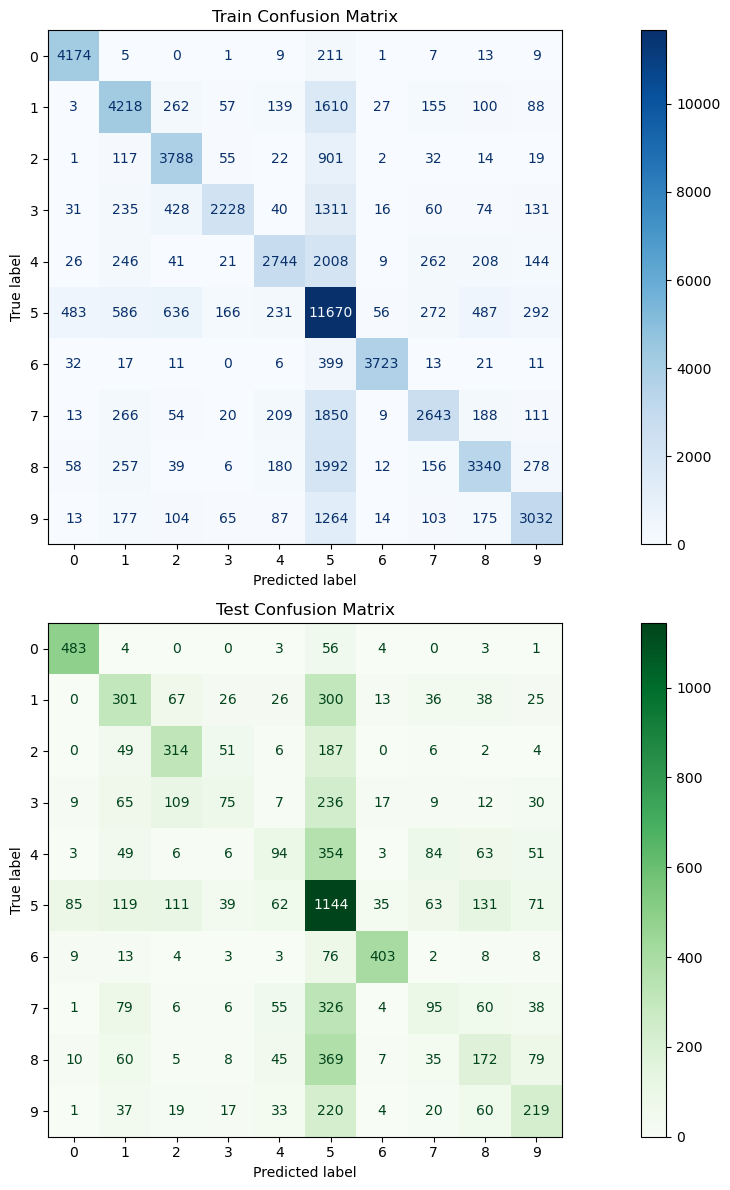

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1
Logistic Regression,0.442813,0.369946,0.486733,0.408792,0.442813,0.369946,0.425394,0.354696
Random Forest,1.000000,0.382565,1.000000,0.392468,1.000000,0.382565,1.000000,0.321532
Decision Tree,1.000000,0.285604,1.000000,0.287596,1.000000,0.285604,1.000000,0.286556
HG Boosting Classification Tree,0.557798,0.409606,0.579736,0.430526,0.557798,0.409606,0.542367,0.399854
XGBoost,0.668920,0.424929,0.703554,0.416486,0.668920,0.424929,0.668311,0.403404


In [22]:
xgb_results = eval_classification(xgb, X_train, b_train, X_val, b_val, model_name="XGBoost", average="weighted", results_frame=hgb_results)
xgb_results

## K Neighbors Classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier 
# knn = KNeighborsClassifier(random_state=42, class_weight="balanced", scoring="balanced_accuracy").fit(X_train.sparse.to_dense(), y_train)
knn = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)

                    Train Evaluation                                                         Test Evaluation                                     
                   precision    recall  f1-score   support                                  precision    recall  f1-score   support              
                                                                                                                                                 
            Latin       0.76      0.89      0.82      4430                           Latin       0.74      0.84      0.79       554              
Metal_Alternative       0.39      0.34      0.36      6659               Metal_Alternative       0.17      0.13      0.15       832              
      Metal_Death       0.34      0.66      0.45      4951                     Metal_Death       0.25      0.50      0.33       619              
      Metal_Heavy       0.29      0.28      0.28      4554                     Metal_Heavy       0.15      0.15      0.15   

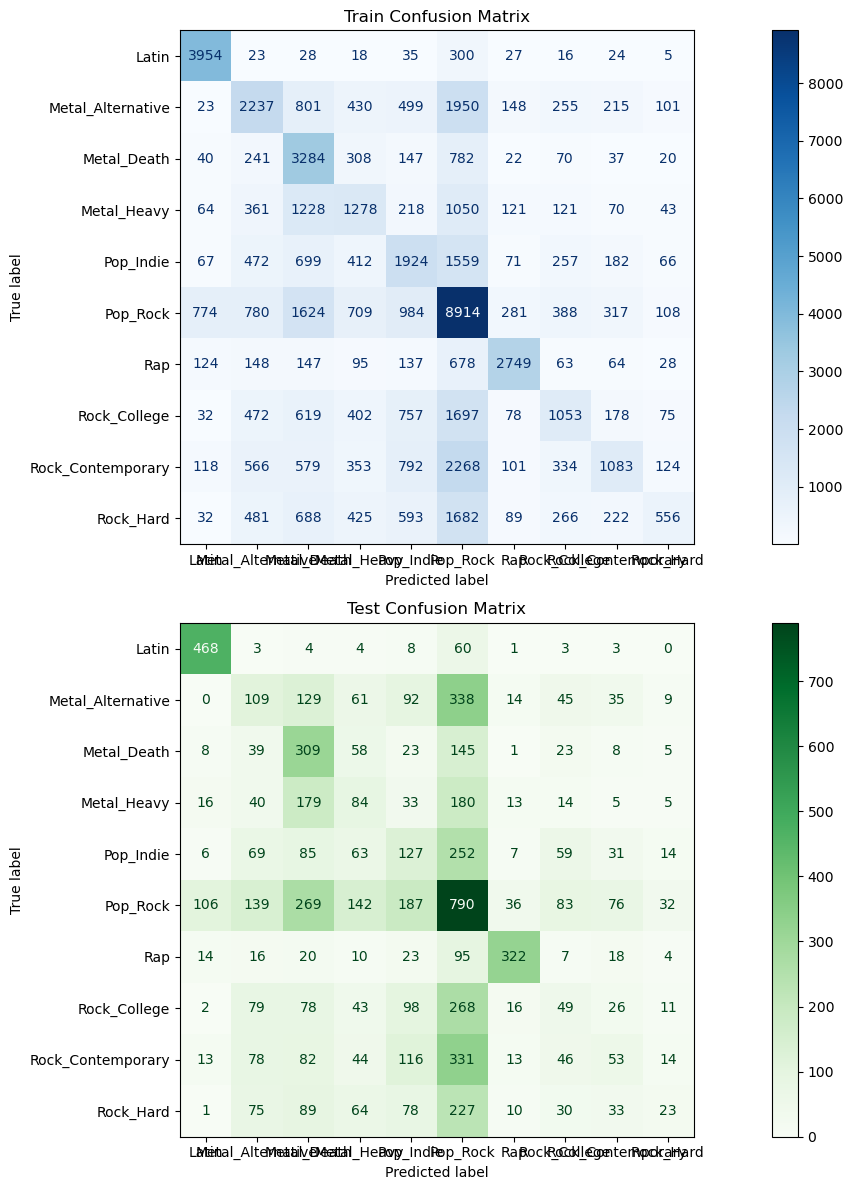

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1
Logistic Regression,0.442813,0.369946,0.486733,0.408792,0.442813,0.369946,0.425394,0.354696
Random Forest,1.000000,0.382565,1.000000,0.392468,1.000000,0.382565,1.000000,0.321532
Decision Tree,1.000000,0.285604,1.000000,0.287596,1.000000,0.285604,1.000000,0.286556
HG Boosting Classification Tree,0.557798,0.409606,0.579736,0.430526,0.557798,0.409606,0.542367,0.399854
XGBoost,0.668920,0.424929,0.703554,0.416486,0.668920,0.424929,0.668311,0.403404
K Nearest Neighbors,0.435088,0.300541,0.443865,0.283641,0.435088,0.300541,0.412305,0.276839


In [24]:
knn_results = eval_classification(knn, X_train, y_train, X_val, y_val, model_name="K Nearest Neighbors", average="weighted", results_frame=xgb_results)
knn_results

## Gaussian Classifier

In [27]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train.sparse.to_dense(), y_train)

                    Train Evaluation                                                         Test Evaluation                                     
                   precision    recall  f1-score   support                                  precision    recall  f1-score   support              
                                                                                                                                                 
            Latin       0.65      0.95      0.77      4430                           Latin       0.63      0.90      0.74       554              
Metal_Alternative       0.30      0.21      0.25      6659               Metal_Alternative       0.16      0.11      0.13       832              
      Metal_Death       0.18      0.94      0.31      4951                     Metal_Death       0.16      0.86      0.28       619              
      Metal_Heavy       0.39      0.07      0.12      4554                     Metal_Heavy       0.12      0.02      0.04   

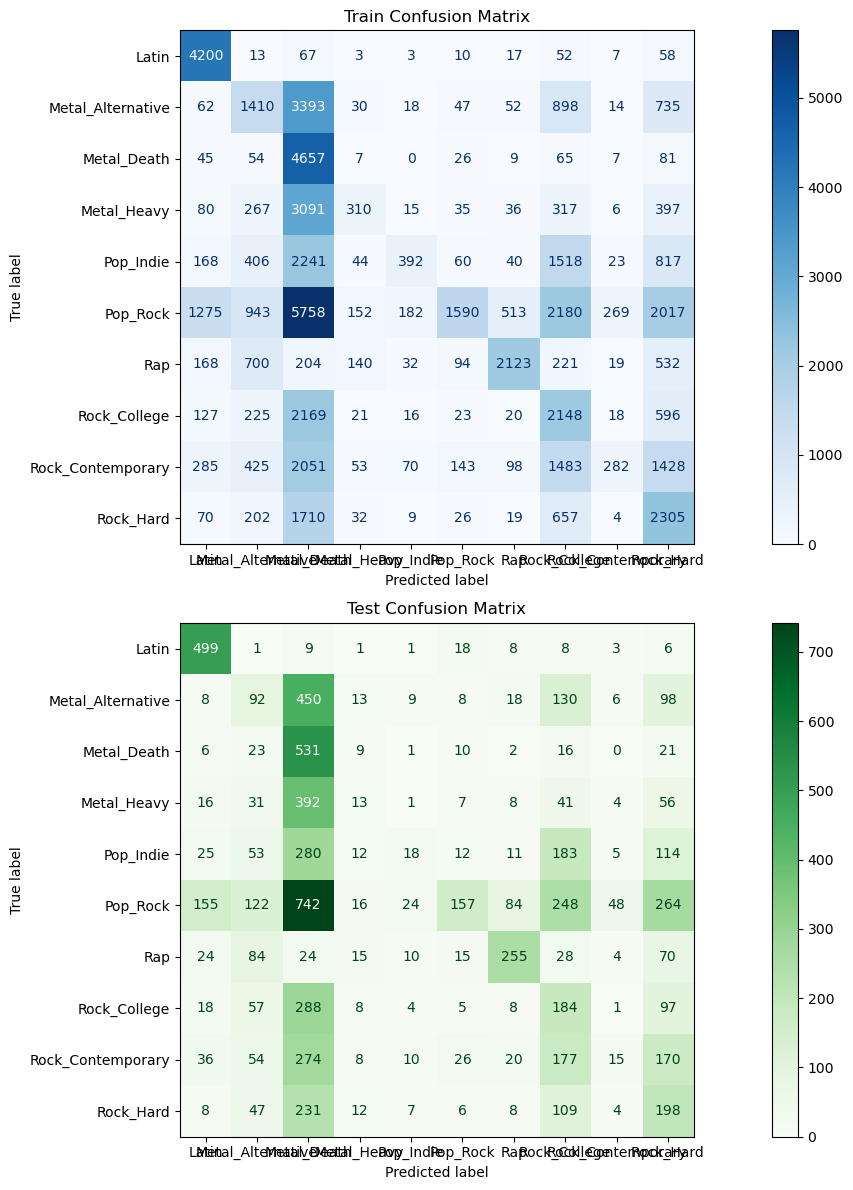

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1
Logistic Regression,0.442813,0.369946,0.486733,0.408792,0.442813,0.369946,0.425394,0.354696
Random Forest,1.000000,0.382565,1.000000,0.392468,1.000000,0.382565,1.000000,0.321532
Decision Tree,1.000000,0.285604,1.000000,0.287596,1.000000,0.285604,1.000000,0.286556
HG Boosting Classification Tree,0.557798,0.409606,0.579736,0.430526,0.557798,0.409606,0.542367,0.399854
XGBoost,0.668920,0.424929,0.703554,0.416486,0.668920,0.424929,0.668311,0.403404
K Nearest Neighbors,0.435088,0.300541,0.443865,0.283641,0.435088,0.300541,0.412305,0.276839
Gaussian Naive-Bayes,0.312522,0.252640,0.490209,0.333089,0.312522,0.252640,0.270988,0.207636


In [28]:
gnb_results = eval_classification(gnb, X_train.sparse.to_dense(), y_train, X_val.sparse.to_dense(), y_val, model_name="Gaussian Naive-Bayes", average="weighted", results_frame=knn_results)
gnb_results